# COMP90016 - Assignment 3
Version 1 Last edited 3/5/2024

## Semester 1, 2024

In [22]:
NAME = "Devavrath Menon"

ID = "1366694"

## Semester 1, 2023

This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic integrity: https://academicintegrity.unimelb.edu.au/

You submission must be your own work. Do not copy material from other students, from the internet or from AI tools. 

Your completed notebook file containing all your answers will be turned in via Canvas. Please also submit an HTML file with the output cleared.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

Some graded cells are code cells, in which you must complete the code to solve a problem. Other graded cells are markdown cells, in which you must write your answers to short-answer questions. 

You will see the following text in graded code cells:

```
# YOUR CODE HERE
raise NotImplementedError()
```

***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***

Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

Only graded cells will be marked.
**Don't make changes outside graded cells, and don't add or remove cells from the notebook**.

>Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to test cases that are included in this document.

No marks are allocated to commenting in your code. We do however, encourage efficient and well-commented code.

The total marks for the assignment add up to 100, and it will be worth 15% of your overall subject grade.

Part 1: 25 marks

Part 2: 40 marks

Part 3: 35 marks

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID at the top of this notebook.


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**

## Overview

In this assignment, you will answer questions about multiple sequence alignment, phylogenetics and metagenomics.

You will use the `biopython` library in your functions. You may want to refer to sections of the documentation for additional help. Additional to `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in Computational Genomics including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.


# Setup

In [23]:
import os
import requests
from IPython.core.display import HTML

# Function to get data. DO NOT MODIFY!
def fetch_file(url, outpath='.'):
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        # Get the filename from the URL
        filename = os.path.basename(url).split('?', 1)[0]
        # Construct the filepath using the specified directory and filename
        filepath = os.path.join(outpath, filename)
        # Create the directory if it doesn't exist
        if not os.path.exists(outpath):
            print(f'Creating output dir: {outpath}')
            os.makedirs(outpath)
        # Check if the file already exists in the specified directory
        if os.path.exists(filepath):
            print(f'{filename} already exists in {outpath}. Skip download.')
        else:
            with open(filepath, 'wb') as f:
                f.write(response.content)
                f.close()
            print(f'Saved to: {filepath}')
    else:
        print(f'File not found: Code {response.status_code}')

In [24]:
# Make the notebook pretty
HTML(requests.get('https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/main/data/2023/style/custom.css').text)

In [25]:
# Fetch assignment data
f_names = ["comp90016_assignment_3_tree.nwk",
          "comp90016_assignment_3_aln.fasta"]

for filename in f_names:
    url = f'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2024/Assignment_03/data/{filename}?raw=true'
    fetch_file(url,'data')
  

File found!
comp90016_assignment_3_tree.nwk already exists in data. Skip download.
File found!
comp90016_assignment_3_aln.fasta already exists in data. Skip download.


## Part 1: Multiple sequence alignment

### Setup

We begin by using `biopython` to import an MSA of the *aphA-3* coding sequence from four different isolates of the bacterium *Enterococcus faecium* from a FASTA file.

In [26]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [27]:
# Import MSA into a Bio.Align.MultipleSeqAlignment object
fname = 'data/comp90016_assignment_3_aln.fasta'
seqs_aphA3 = AlignIO.read(fname, "fasta")
msa_aphA3 = MultipleSeqAlignment(seqs_aphA3)

# Print the number of aligned sequences
print(len(msa_aphA3))

# Print the alignment length
msa_aphA3.get_alignment_length()

4


786

In [28]:
# Create demo MSAs for test input
seqs_a = [SeqRecord(Seq('ACGT')), SeqRecord(Seq('AGGT')), SeqRecord(Seq('AC-T'))]
seqs_b = [SeqRecord(Seq('GCGGATATGGCGAT')), SeqRecord(Seq('GCAGATCTGGCGA-')), SeqRecord(Seq('GCGCATATTGCG--'))]

demo_msa_a = MultipleSeqAlignment(seqs_a)
demo_msa_b = MultipleSeqAlignment(seqs_b)

### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 1.1</h3>
    
(5 marks, max 100 words)

The *Enterococcus faecium aphA-3* gene product confers resistance to the antibiotic kanamycin. Using the conding sequences provided, suggest why only isolate c is sensitive (not resistant) to kanamycin, despite having a copy of the *aphA-3* gene.

</div>


#### -- GRADED CELL (5 marks) - complete this cell -- 

Isolate c is sensitive to kanamycin because it has a deletion mutation in the aphA-3 gene, a two-base pair deletion (GG) in the coding sequence  which likely causes a frameshift mutation. This frameshift results in a nonfunctional protein product or no production at all. Resulting in kanamycin sensitivity.

<div class="info">
<h3> Question 1.2 </h3>

(5 marks)  
    
Scoring schemes are very important when comparing sequence alignments.

The Sum of Pairs (SP) score evaluates a multiple sequence alignment by examining each column and considering every possible pair of characters within that column. For each pair, a score is assigned, according to a predefined scoring system. This process is repeated for every column in the alignment. The scores for __all__ pairs in each column are then summed together to produce a total score for the alignment.
    
An example scoring system could be:

- Match (A|A) = 1

- Mismatch (A|T or A|-) = 0

- Aligned gaps (-|-) = 0 
 
<b>Challenge:</b> Write a python function to calculate the SP score for an MSA. 

- [ ] Input: 
    - a Bio.Align.MultipleSeqAlignment object (msa)
    - a match, mismatch and aligned_gap scores as integers.
- [ ] Output: an integer.
- [ ] If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.

</div>

In [29]:
# GRADED CELL 1.2 (5 marks, max 1 min run-time)
%time
from itertools import combinations

def sp_score(msa, match, mismatch, aligned_gap):
    """
    Calculate the SP score for an MSA. 
    Input: 
        - a Bio.Align.MultipleSeqAlignment object (msa)
        - a match, mismatch and aligned_gap scores as integers.
    Output: an integer.
    If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
    """
    
    # YOUR CODE HERE
    if len(msa) <= 2:
        return None

    total_score = 0

    # Iterate over each column in the alignment
    for i in range(msa.get_alignment_length()):
        column = msa[:, i]
        pairs = combinations(column, 2)  # Generate all possible pairs

        for (a, b) in pairs:
            if a == b:
                if a == '-':
                    total_score += aligned_gap
                else:
                    total_score += match
            else:
                total_score += mismatch

    return total_score



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


In [30]:
# Test your function in this cell
print(sp_score(demo_msa_a, 1, 0, 0)) # should output 8
print(sp_score(demo_msa_b, 1, 0, 0)) # should output 29

print(sp_score(msa_aphA3, 1, 0, 0))

8
29
4683


In [31]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 1.3 </h3>

(5 marks)  
    
An alternate scoring system is the minimum entropy score, which assesses the quality of a multiple sequence alignment by calculating a score for each column in the alignment. The score for each column is derived using the following entropy-based formula.
    
# <center>$-\sum _i c_i \times log_2(\frac{c_i}{C})$</center>    

Where $c_i$ is the number of occurrences of character $i$ in a column and $C$ is the number of sequences in the MSA.
    
The score for each column reflects the diversity of characters at that position; a completely conserved column (where all characters are the same) yields a score of 0. The total alignment score is calculated by summing the scores from all columns. With this scoring system, a lower score indicates a better alignment.

<b>Challenge:</b> Write a python function to calculate the minimum entropy score for an MSA.

- [ ] Input: a Bio.Align.MultipleSeqAlignment object (msa).
- [ ] Output: a floating point number (no rounding).
- [ ] If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
- [ ] Treat a gap the same as any other character.

</div>

In [32]:
# GRADED CELL 1.3 (5 marks, max 1 min run-time)
%time
from math import log2

def mes_score(msa):
    """
    Calculate the minimum entropy score for an MSA. 
    Input: a Bio.Align.MultipleSeqAlignment object (msa).
    Output: a floating point number.
    If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
    Treat a gap the same as any other character.
    """
    
    if len(msa) <= 2:
        return None
    
    num_sequences = len(msa)
    alignment_length = msa.get_alignment_length()
    total_score = 0.0
    
    for col in range(alignment_length):
        column = [msa[i, col] for i in range(num_sequences)]
        unique_chars = set(column)
        column_score = 0.0
        
        for char in unique_chars:
            ci = column.count(char)
            ci_div_C = ci / num_sequences
            column_score -= ci * log2(ci_div_C)
        
        total_score += column_score
    
    return round(total_score, 2)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [33]:
# Test your function in this cell
print(mes_score(demo_msa_a)) # should output ~ 5.51
print(mes_score(demo_msa_b)) # should output ~ 16.53

print(mes_score(msa_aphA3))

5.51
16.53
32.23


In [34]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="question">
<h3>Question 1.4</h3>
    
(10 marks, max 100 words)

If you were going to choose one of these scoring systems to use in an MSA tool, which would you choose? Justify your choice with reference to the algorithms.

</div>


#### -- GRADED CELL (10 marks) - complete this cell -- 
 
 
 I would use Sum of Pairs. Since it calculates in pairs, it offers a more nuanced numerical value to alignment and is more suited for a general understanding of quality of MSA. I would not use MES as it requires the entire column to match to be awarded a 0 and thus seems better suited to score conservation observed in the MSA.

## Part 2: Phylogenetics

The questions in part two relate to [this 2021 paper](https://www.sciencedirect.com/science/article/abs/pii/S1055790321001147)  

>Esquerré, D., Donnellan, S. C., Pavón-Vázquez, C. J., Fenker, J. & Keogh, J. S. Phylogeography, historical demography and systematics of the world’s smallest pythons (Pythonidae, Antaresia). Molecular Phylogenetics and Evolution 161, 107181 (2021).

We will also be using `biopython` to read in phlogenetic trees as `Newick.Tree` objects.

In [35]:
from Bio import Phylo

The Newick file we will be using includes a phylogenetic tree of the mitochondrial cytochrome b genes from a subset of the  *Antaresia* samples. 

In [36]:
# Import the gene tree.
cyt_b_tree = Phylo.read("data/comp90016_assignment_3_tree.nwk", "newick")
cyt_b_tree.root_at_midpoint()
print(cyt_b_tree)

Tree(rooted=True, weight=1.0)
    Clade()
        Clade(branch_length=0.18158764435000002, name='100/100')
            Clade(branch_length=0.0020949192, name='009_ABTC76765_Aus_Institute_of_Marine_Sciences_Rd_QLD_con...')
            Clade(branch_length=2.4983e-06, name='011_ABTC83016_Paluma_Range_QLD_consensus')
        Clade(branch_length=0.008753450449999978, name='91.5/85')
            Clade(branch_length=0.0374520936, name='90.3/85')
                Clade(branch_length=0.0134440936, name='89.6/85')
                    Clade(branch_length=0.0072622166, name='88.3/86')
                        Clade(branch_length=0.0052812207, name='94/98')
                            Clade(branch_length=0.0019634394, name='061_ABTC126638_Kingfisher_Island_WA_consensus')
                            Clade(branch_length=0.0009545937, name='45.6/88')
                                Clade(branch_length=0.0068135484, name='035_ABTC126610_Coronation_Island_WA_consensus')
                                Cla

### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 2.1</h3>

(5 marks, max 50 words)
    
Suggest why *Morelia bredli* was used as an outgroup in the phylogenetic analyses. 

</div>


-- GRADED CELL (5 marks) - complete this cell --
Morelia bredli was used as an outgroup in phylogenetic analyses due to its clear evolutionary distinction from the ingroup species but still close, which provides context to evolution within in-group, thereby improving  interpretations.


<div class="question">
<h3>Question 2.2</h3>

(5 marks, max 50 words)

Suggest why the mitochondrial cytochrome b gene was selected for the analysis. 
</div>


-- GRADED CELL (5 marks) - complete this cell --
The mitochondrial cytochrome b gene was chosen for its extensive sequence variability. It is useful for proposing phylogenetic relationships within genus or families and classifying new species under right genus.

<div class="question">
<h3>Question 2.3</h3>
    
(5 marks, max 100 words)

Suggest why monomorphic SNPs and SNPs with low read depth were removed. 
</div>


-- GRADED CELL (5 marks) - complete this cell --
Monomorphic SNPs are removed because they lack variation among individuals in the study population making them uninformative for analysis. SNPs with low read depth are excluded as a quality control measure due to low confidence in their accuracy as less coverage increases the likelihood of sequencing errors and low confidence in  calls. Removing these SNPs ensures that we are confident data we use for downstream analysis and analysis is robust due to variation in data. 

<div class="question">
<h3>Question 2.4</h3> 

(5 marks, max 100 words)
    
`IQ-tree` was used for treebuilding with the cytochrome b sequences. Many computational genomics tools including `IQ-tree` use algorithms that are not deterministic; they can produce different outputs on repeated runs with the same input. 

Explain why this is a challenge for reproducibility and how this can be addressed by users. 

</div>


-- GRADED CELL (5 marks) - complete this cell --
Lack of reproducibility in treebuilding can make comparing analyses difficult. IQ-tree offers methods to add a seed to aid with reproducibility and bootstrapping to provide support values. 

<div class="info">
<h3> Question 2.5 </h3>

(10 marks, max 1 min run-time)

Colless’ imbalance ($I_{c}$) is a metric that relates to the shape (or balance) of phylogenetic trees. It is calculated according to the following formula:


# <center>$I_{c}=\frac{ \sum_{InteriorNodes} |T_{R}-T_{L}| }{ \frac{(n-1)(n-2)}{2} }$</center>

Where: 
* $T_{R}$ and $T_{L}$ are the number of taxa descended from the right and left branches respectively, of an interior node. 
* The interior nodes are all the nodes (including the root) that are not tips. 
* *n* is the total number of taxa in the tree (including tips). 
* *(n-1)(n-2)/2* is the maximum possible value of the numerator, therefore the value of $I_{c}$ ranges from 0 to 1.

Write a Python function to calculate the Colless’ imbalance of a phylogenetic tree. 
    
- [ ] Input: a Newick.Tree object containing a rooted binary tree (tree).
- [ ] Assume every node in tree has either 0 children or 2 children. 
- [ ] Return a floating-point number (no rounding). 
- [ ] If tree contains fewer than 3 nodes, return None.
</div>

In [37]:
# GRADED CELL 2.5 (10 marks, max 1 min run-time)
%time
def colless_imbalance(tree):
    """
    Calculate the Colless’ imbalance of a phylogenetic tree.
    Input: a Newick.Tree object containing a rooted binary tree (tree).
    Assume every node in tree has a unique name and has either 0 children or 2 children.
    Return a floating-point number.
    If tree contains fewer than 3 nodes, return None.
    """
    node_count = len(tree.get_terminals()) + len(tree.get_nonterminals())
    
    # Check if the tree has fewer than 3 nodes (including tips and internal nodes)
    if node_count < 3:
        return None

    # Calculate the numerator and denominator
    imbalance_sum = 0
    possible_pairs = ((node_count - 1) * (node_count - 2)) / 2

    # Traverse the tree and calculate Colless' imbalance
    for internal_node in tree.get_nonterminals():
        # Count the number of descendants in the left and right branches
        left_count = len(internal_node.clades[0].get_terminals()) + len(internal_node.clades[0].get_nonterminals())
        right_count = len(internal_node.clades[1].get_terminals()) + len(internal_node.clades[1].get_nonterminals())

        # Calculate the absolute difference
        imbalance = abs(left_count - right_count)
        imbalance_sum += imbalance

    # Calculate Colless' imbalance
    colless_score = imbalance_sum / possible_pairs

    return colless_score

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


demo_tree_a


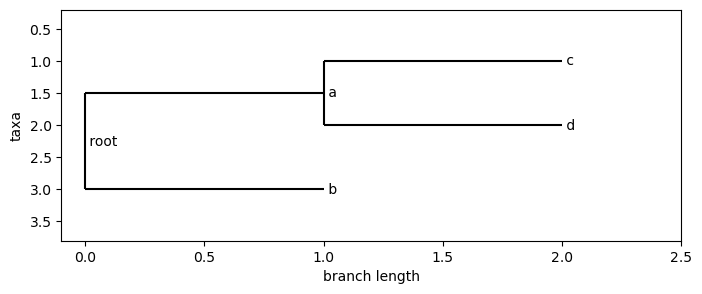

This tree has 5 taxa (including root) and 2 internal nodes.

Colless Imbalance for demo_tree_a is: 0.3333333333333333
64.9 µs ± 984 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [38]:
# Test your function in this cell

# Create a demo tree
from io import StringIO
demo_tree_a = Phylo.read(StringIO("((c,d)a,b)root;"), "newick")

# Inspect the tree
print("demo_tree_a")
Phylo.draw(demo_tree_a)
print("This tree has 5 taxa (including root) and 2 internal nodes.\n")

# Check expected output on demo data
print(f'Colless Imbalance for demo_tree_a is: {colless_imbalance(demo_tree_a)}') # Should output 0.3333...

# Test the function run time
%timeit colless_imbalance(demo_tree_a) 

# Write your own tests here:

In [39]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 2.6 </h3> 

(10 marks, max 1 min run-time)

A phylogenetic tree can be stored in Newick format in several non-unique arrangements. Aside from topology, Newick files can also store branch length and branch support information. 

Write a Python function that determines whether a group of phylogenetic trees has a common, identical topology. 

- [ ] Input: a list of Newick.Tree objects (tree_list). 
- [ ] Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
- [ ] Return the Boolean value True if all the trees in tree_list share an identical topology.
- [ ] Return the Boolean value False if they do not.
- [ ] If tree_list contains fewer than 2 Newick.Tree objects, return None.
</div>

In [40]:
# GRADED CELL 2.6 (10 marks, max 1 min run-time)

# Optional import
from itertools import combinations

def common_topology(tree_list):
    """
    Determine whether a group of phylogenetic trees has a common, identical topology. 
    Input: a list of Newick.Tree objects (tree_list).
    Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
    Return the Boolean value True if all the trees in tree_list share an identical topology.
    Return the Boolean value False if they do not.
    If tree_list contains fewer than 2 Newick.Tree objects, return None.
    """
    def get_topology(node):
        if not node.clades:
            return (node.name,)

        clade_topologies = [get_topology(clade) for clade in node.clades]
    
        clade_topologies = sorted(clade_topologies, key=lambda x: (str(x),))
  
        return tuple(clade_topologies)

    def compare_topologies(tree1, tree2):
        topology1 = get_topology(tree1.root)
        topology2 = get_topology(tree2.root)
        return topology1 == topology2


    if len(tree_list) < 2:
        return None

    for tree1, tree2 in combinations(tree_list, 2):
        if not compare_topologies(tree1, tree2):
            return False

    return True


demo_tree_a


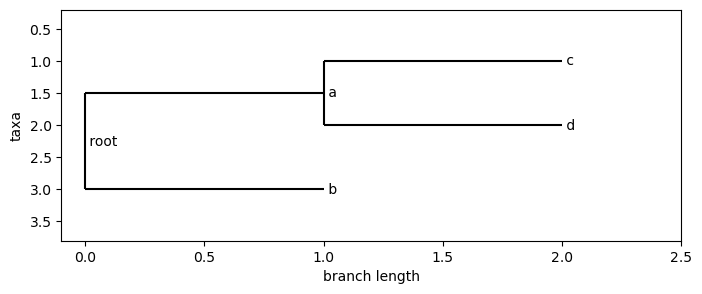

demo_tree_b


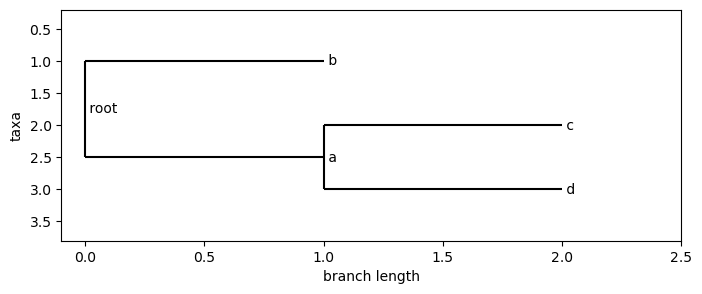

demo_tree_c


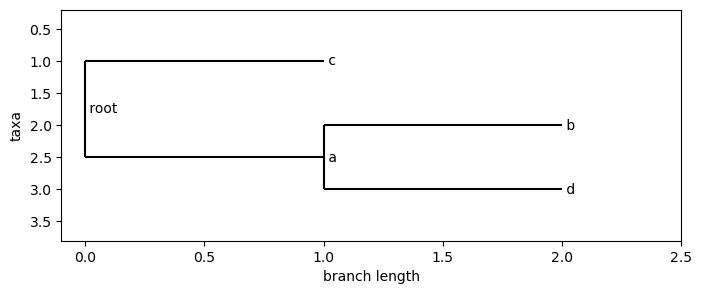

True
False


In [ ]:
# Test your function in this cell

# Create some more demo trees
demo_tree_b = Phylo.read(StringIO("(b,(c,d)a)root;"), "newick")
demo_tree_c = Phylo.read(StringIO("(c,(b,d)a)root;"), "newick")

# Inspect the trees
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3)

print("demo_tree_a")
Phylo.draw(demo_tree_a)

print("demo_tree_b")
Phylo.draw(demo_tree_b)

print("demo_tree_c")
Phylo.draw(demo_tree_c)

# Check expected output on demo data
print(common_topology([demo_tree_a, demo_tree_b])) # should output True
print(common_topology([demo_tree_a, demo_tree_c])) # should output False

# Test the function run time
%timeit common_topology([demo_tree_a, demo_tree_b])

# Write your own tests here:


In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


## Part 3: Metagenomics

### Setup

`Kraken2` is a tool used to assign taxonomic labels to metagenomic readsets. Output from `Kraken2` was used in workshop 10. 

`Kraken2` is described in the publication below. Please read it before answering the questions.

>https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1891-0

Its predecessor `Kraken` is described here.

>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053813/pdf/gb-2014-15-3-r46.pdf


### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 3.1</h3>

(20 marks, max 50 words)
    
In your own words, describe the method used by `Kraken2` to assign a taxonomic classification to each read in a metagenomic readset. Include a description of the database and the classification tree. Include each of the main steps of the algorithm. 

</div>


-- GRADED CELL (20 marks) - complete this cell --

It classifies reads by using  k-mers and comparing these to a pre-built database of known genomes. Matches are used to assign reads to taxa using a taxonomic tree, which organizes and ranks the matches hierarchically.

<div class="question">
<h3>Question 3.2</h3>

(5 marks, max 50 words)

What is the main limitation to using `Kraken2` to estimate the microbial diversity of a previously unsampled environment?
    
</div>


-- GRADED CELL (5 marks) - complete this cell --

Since it is unsampled, it could have organisms that are not present in Kraken's standard database. So when the kmers are being compared to genomes in standard database it would result in poor classification and consequently poor understanding of diversity. 

<div class="question">
<h3>Question 3.3</h3>
    
(10 marks, max 100 words)

Explain how Kraken2 achieves high classification accuracy while minimising memory usage.
    
</div>


-- GRADED CELL (10 marks) - complete this cell --

Kraken2 achieves high classification accuracy and minimizes memory usage via the use of an efficient probabilistic hash map and stores only minimizers of reference instead of all their kmers. This results in some loss of accuracy. It uses spaced seeds search and masks low complexity regions that consist of repeats to improve accuracy. 

# END OF ASSIGNMENT

## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via Canvas in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared.


Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**
